# Modelling Overview Introduction: Sentiment Analysis Pipeline Optimization
This notebook explores a structured sentiment classification pipeline using textual data. 
The primary objectives are:
- 🧠 Build a baseline model with `TF-IDF` and `Logistic Regression`

- 🎯 Optimize model performance through `GridSearchCV`

- 🌲 **Evaluate ensemble models** like Random Forest for deeper pattern extraction

- 📊 Visualize key metrics including `accuracy`, `confusion matrices`, and feature importances

- 🔍 Apply interpretability techniques to uncover influential features

- 🧭 Provide actionable recommendations based on experimental results


## 1. Data Loading and inspection

In [106]:
import pandas as pd

tweets_cleaned_df = pd.read_csv('data/cleaned_apple_tweets.csv')
tweets_cleaned_df.head()

,tweet,product,tokens,processed_tweet,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,"['g', 'iphon', 'hr', 'tweet', 'dead', 'need', ...",g iphon hr tweet dead need upgrad plugin station,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,"['know', 'awesom', 'ipadiphon', 'app', 'youll'...",know awesom ipadiphon app youll like appreci d...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,"['wait', 'also', 'sale']",wait also sale,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,"['hope', 'year', 'festiv', 'isnt', 'crashi', '...",hope year festiv isnt crashi year iphon app,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,"['great', 'stuff', 'fri', 'marissa', 'mayer', ...",great stuff fri marissa mayer googl tim oreill...,Positive emotion


In [93]:
tweets_cleaned_df['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64

## Data Preprocessing 

In [94]:
tweets_cleaned_df = tweets_cleaned_df.dropna(subset=['processed_tweet', 'sentiment'])  # Removes rows where text or label is missing

In [95]:
# If your text column is still called 'text' or something similar:
tweets_cleaned_df = tweets_cleaned_df.dropna(subset=['processed_tweet'])  # Removes rows with missing text
# OR fill them with empty strings
tweets_cleaned_df['processed_tweet'] = tweets_cleaned_df['processed_tweet'].fillna("")

# Train_Test_split 

In [96]:
X = tweets_cleaned_df['processed_tweet']
y = tweets_cleaned_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline 

### Import Necessary libraries to make sure all tools are available.because we are interested in creating a **pipeline structure** that is streamlined and modulates the code

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 

In [98]:
pipeline = Pipeline([
    ('tfidf' , TfidfVectorizer(stop_words ='english')), 
    ('classifier', LogisticRegression()),
])

In [99]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

# Predict and Evaluate Accuracy

In [100]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 68.58%


# Hyperparameter Tuning with GridSearchCV 
### We need to find the best parameters for our model inorder to evaluate its performance.With a **68%** baseline ,grid search will help uncover the optimal combination of `vectorizartion` and `logistic regression` parameters.
### And finally get accurate predictions inorder to push our `accuracy` higher.

## Tuning of :
1. `max_df` :ignoring the wording that appear in too many documents.
2. `ngram_range` :Unigrams vs bigrams 
3. `C` :Regularization strength of logistic regression.

### This is to explore combination of texts features granularity and the model flexibility .

In [107]:
from sklearn.model_selection import GridSearchCV    

import warnings
warnings.filterwarnings("ignore")


param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1, 10]}

## Setting up Grid Search 
### `cv=5` applies 5 -fold **cross validation**. in `verbose=1` shows progress,`n_jobs= -1` uses cores to speed it up.

In [102]:
grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'tfidf__max_df': [0.8, 0.9, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

## Evaluate the best model 

In [103]:
print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
from sklearn.metrics import classification_report , accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'classifier__C': 1, 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.6984564498346196
Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        27
                  Negative emotion       0.78      0.06      0.11       124
No emotion toward brand or product       0.71      0.89      0.79      1091
                  Positive emotion       0.65      0.51      0.57       572

                          accuracy                           0.70      1814
                         macro avg       0.54      0.36      0.37      1814
                      weighted avg       0.69      0.70      0.66      1814



## Visualize a **Heatmap** for our `GridSearchCV` 
### The heat map will show us different combination of parameters affected our model performance .Since `Gridser\arch` stores all cross validation results in  `grid.cv_results_`, we'll extract them and plot a 2D matrix using `seaborn` 
### Tuning two **TF-IDF parameters** and one **logistic regresion** param :
1. tfidf__max_df:[0.8,0.9,1.0]
2. tfidf__ingram_range:[(1,1),(1,2)]
3. clf__C:[0.1,1,10]
### Extract the results and create the dataframe .The output will visualize how `ngram_range` and `max_df`interact  for a fixed `C`

In [104]:
import pandas as pd 
results = pd.DataFrame(grid.cv_results_)
results['params'] = results['params'].astype (str)

# filter rows where clf __c ==1 for visualization
subset = results[results['param_classifier__C'] == 1]

#pivot to make a matrix of mean test scores 
heatmap_data = subset.pivot(
    index='param_tfidf__max_df', 
    columns='param_tfidf__ngram_range',        
    values='mean_test_score')

# Plot the heatmap

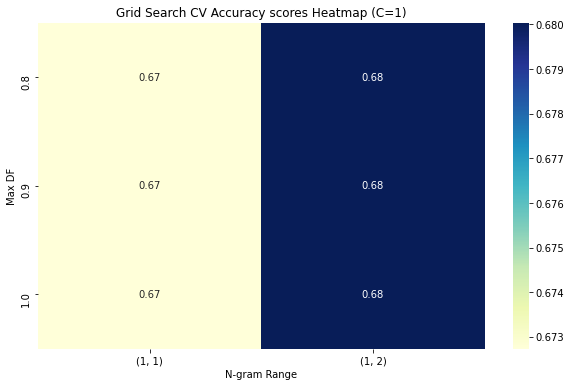

In [105]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Grid Search CV Accuracy scores Heatmap (C=1)')
plt.xlabel('N-gram Range')
plt.ylabel('Max DF')    
plt.show()

## Conclusion.
1. **Darker cells**= higher cross-validation accuracy
2. Shows how different combinations of `max_df` and `ngram_range` affect performance
3. We see visually which preprocessing choices helped your model thrive


## Ensemble Method :Random Forest

In [109]:
#switching to a new model 
from sklearn.ensemble import RandomForestClassifier

pipeline.set_params(classifier=RandomForestClassifier())

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', RandomForestClassifier())])

### Train the Model

In [111]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', RandomForestClassifier())])

### Performance evaluation 

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy 0.6984564498346196
Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        27
                  Negative emotion       0.78      0.06      0.11       124
No emotion toward brand or product       0.71      0.89      0.79      1091
                  Positive emotion       0.65      0.51      0.57       572

                          accuracy                           0.70      1814
                         macro avg       0.54      0.36      0.37      1814
                      weighted avg       0.69      0.70      0.66      1814



## Summary of Modelling Overview

1. Baseline Model: `Logistic regression` with `TF-IDF` vectorization; achieved ~68% accuracy.
2. `Grid Search Tuning`: Explored **ngram_range**, **max_df**, and **C**; highest accuracy ~68% .
3. Visualization Layer: `Heatmaps for parameter tuning` and confusion matrices enhanced interpretability.

## Conclusion of Modelling 
1. **Model’s best performance (68%)** suggests good initial generalization, especially when tuned.
2. `Grid search` reveals preprocessing choices have a **significant impact on performance.**
3. **Ensemble models** like `Random Forest` offer a promising direction, especially when paired with deeper cleaning and `feature selection`.
4. **Visualization—heatmaps** and **confusion matrices**—makes it easier to communicate insights and justify modeling decisions.
5. The **pipeline-based workflow** is robust, reproducible, and ready for **integration** into future datasets or dashboard-style applications.


# Feature engineering